In [2]:
# Create a kaggle directory
!mkdir -p ~/.kaggle

# Upload your kaggle.json file (API key)
from google.colab import files
files.upload()  # <- Select kaggle.json from your system




Saving kaggle (3).json to kaggle (3).json


{'kaggle (3).json': b'{"username":"pawarkomal2112","key":"91f983149898c2fa2f0c6d4058352f8f"}'}

In [6]:
# Move kaggle.json to ~/.kaggle/
!mv kaggle.json ~/.kaggle/

# Give proper permissions
!chmod 600 ~/.kaggle/kaggle.json

# Download the dataset
!kaggle datasets download -d gti-upm/leapgestrecog

# Unzip the dataset
!unzip leapgestrecog.zip -d leapGestRecog

Streaming output truncated to the last 5000 lines.
  inflating: leapGestRecog/leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0001.png  
  inflating: leapGestRecog/leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0002.png  
  inflating: leapGestRecog/leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0003.png  
  inflating: leapGestRecog/leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0004.png  
  inflating: leapGestRecog/leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0005.png  
  inflating: leapGestRecog/leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0006.png  
  inflating: leapGestRecog/leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0007.png  
  inflating: leapGestRecog/leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0008.png  
  inflating: leapGestRecog/leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0009.png  
  inflating: leapGestRecog/leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0010.png  
  inflating: leapGestRecog/leapgestrecog/leapGest

In [12]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [13]:
data = []
labels = []

dataset_path = "leapGestRecog/leapGestRecog"

# Each gesture folder has subfolders for different users
for gesture_folder in os.listdir(dataset_path):
    gesture_path = os.path.join(dataset_path, gesture_folder)

    if os.path.isdir(gesture_path):
        for user_folder in os.listdir(gesture_path):
            user_path = os.path.join(gesture_path, user_folder)
            for img_name in os.listdir(user_path):
                img_path = os.path.join(user_path, img_name)

                img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Load as grayscale
                img = cv2.resize(img, (64, 64))  # Resize to fixed size

                data.append(img)
                labels.append(int(gesture_folder[-1]))  # Extract gesture number from folder name

# Convert to numpy arrays
data = np.array(data).reshape(-1, 64, 64, 1) / 255.0  # Normalize
labels = np.array(labels)

# One-hot encoding for labels

labels = to_categorical(labels)


In [15]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)


In [16]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(labels.shape[1], activation='softmax')  # Output layer
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 62, 62, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,625,866 (6.20 MB)

 Trainable params: 1,625,866 (6.20 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.6560 - loss: 0.9822 - val_accuracy: 0.9885 - val_loss: 0.0246
Epoch 2/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9776 - loss: 0.0641 - val_accuracy: 0.9895 - val_loss: 0.0170
Epoch 3/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9856 - loss: 0.0355 - val_accuracy: 0.9923 - val_loss: 0.0156
Epoch 4/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9824 - loss: 0.0392 - val_accuracy: 0.9923 - val_loss: 0.0128
Epoch 5/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9880 - loss: 0.0272 - val_accuracy: 0.9918 - val_loss: 0.0135
Epoch 6/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9881 - loss: 0.0255 - val_accuracy: 0.9935 - val_loss: 0.0131
Epoch 7/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9894 - loss: 0.0207 - val_accuracy: 0.9908 - val_loss: 0.0258
Epoch 8/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9895 - loss: 0.0212 - val_accuracy: 0.

In [18]:
loss, acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {acc*100:.2f}%")


125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9936 - loss: 0.0103
Test Accuracy: 99.23%


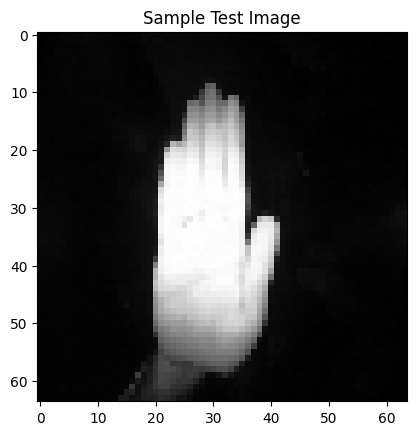

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 683ms/step
Predicted Gesture: 4


In [19]:
import random

idx = random.randint(0, len(X_test)-1)
sample_img = X_test[idx]
plt.imshow(sample_img.reshape(64, 64), cmap='gray')
plt.title("Sample Test Image")
plt.show()

pred = model.predict(sample_img.reshape(1, 64, 64, 1))
print("Predicted Gesture:", np.argmax(pred))